# Sommaire :

<a href="#A1">**Partie 1 : Présentation de la base**</a>

<a href="#A2">**Partie 2 : Nettoyage**</a>
 - <a href="#C3">2-1 : Suppression des colonnes vides</a>
 - <a href="#C4">2-2 : Suppression des lignes en doublons</a>
 - <a href="#C5">2-3 : Réduction de la base aux bâtiments non destinés à l’habitation</a>
 - <a href="#C6">2-4 : Vérification des types</a>
 - <a href="#C7">2-5 : Suppression des outliers</a>
 - <a href="#C71">2-6 : Nettoyage des étiquettes</a>
    
<a href="#A3">**Partie 3 : Exploration**</a>
 - <a href="#C8">3-1 : Analyse Univariée</a>
 - <a href="#C9">3-2 : Analyse Bivariée</a>
 - <a href="#C10">3-3 : Feature engineering</a>

## <a name="A1">**Partie 1 : Présentation de la base**</a>

In [144]:
#Général
import numpy as np
import pandas as pd
import os
import ast
import datetime
import time

#Traitement du texte
import nltk
nltk.download('averaged_perceptron_tagger')
import re
from sklearn.preprocessing import LabelEncoder

#Feature extraction
from sklearn.feature_extraction.text import CountVectorizer

#Classification
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from nltk.classify import NaiveBayesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import roc_auc_score, auc 
from nltk.classify import accuracy

#model selection
from sklearn.model_selection import GridSearchCV, train_test_split

#Visualisation
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import folium
import folium.plugins
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import missingno as msno

#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Descriptions produits
df = pd.read_csv(r"C:\Users\John\Desktop\Formation\6-Classifiez automatiquement des biens de consommation\1-Projet_6\flipkart_com-ecommerce_sample_1050.csv")
df = df.sample(1000)

In [3]:
# Images
im = r"C:\Users\John\Desktop\Formation\6-Classifiez automatiquement des biens de consommation\1-Projet_6\Images"

In [4]:
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
596,e4922f01eda047582cd72e9d1063ab7a,2016-02-25 09:50:31 +0000,http://www.flipkart.com/v-creations-bonsai-cac...,V Creations Bonsai Cactus Artificial Plant wi...,"[""Home Decor & Festive Needs >> Flowers, Plant...",ARPEFYZQ7PZSTFFS,1575.0,725.0,e4922f01eda047582cd72e9d1063ab7a.jpg,False,Specifications of V Creations Bonsai Cactus Ar...,No rating available,No rating available,V Creations,"{""product_specification""=>[{""key""=>""Sales Pack..."
260,04f9f818e2d657b873b07578cfe2eade,2015-12-01 12:40:44 +0000,http://www.flipkart.com/monil-cow-calf-showpie...,Monil Cow With Calf Showpiece - 10.2 cm,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIEAF2JJFSBXFMH,1000.0,520.0,04f9f818e2d657b873b07578cfe2eade.jpg,False,Buy Monil Cow With Calf Showpiece - 10.2 cm ...,No rating available,No rating available,Monil,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
662,70d571a25d37e16d5d5f4e94faccf454,2015-12-31 09:19:31 +0000,http://www.flipkart.com/hargunz-polyester-brow...,"Hargunz Polyester Brown, White Motif Eyelet Lo...","[""Home Furnishing >> Curtains & Accessories >>...",CRNEYW6P8NZEK9EQ,1099.0,656.0,70d571a25d37e16d5d5f4e94faccf454.jpg,False,"Hargunz Polyester Brown, White Motif Eyelet Lo...",No rating available,No rating available,Hargunz,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-s...,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2ZEPACRQJKH7,1190.0,595.0,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Pack..."
671,0ca8e323551dd7107ef57ef7c3e77aee,2015-12-31 09:19:31 +0000,http://www.flipkart.com/niksales-7-w-led-bulb/...,NIKsales 7 W LED Bulb,"[""Kitchen & Dining >> Lighting >> Bulbs >> NIK...",BLBEDZE5C9G5GDP8,750.0,365.0,0ca8e323551dd7107ef57ef7c3e77aee.jpg,False,Buy NIKsales 7 W LED Bulb for Rs.365 online. N...,No rating available,No rating available,NIKsales,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 162 to 235
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1000 non-null   object 
 1   crawl_timestamp          1000 non-null   object 
 2   product_url              1000 non-null   object 
 3   product_name             1000 non-null   object 
 4   product_category_tree    1000 non-null   object 
 5   pid                      1000 non-null   object 
 6   retail_price             999 non-null    float64
 7   discounted_price         999 non-null    float64
 8   image                    1000 non-null   object 
 9   is_FK_Advantage_product  1000 non-null   bool   
 10  description              1000 non-null   object 
 11  product_rating           1000 non-null   object 
 12  overall_rating           1000 non-null   object 
 13  brand                    678 non-null    object 
 14  product_specifications 

In [6]:
print('nb d\'images : ',len(os.listdir(im)))

nb d'images :  1050


## <a name="A2">**Partie 2 : Cleaning**</a>

## Suppression des colonnes et lignes vides

In [7]:
df.drop(columns = 'brand', inplace = True)
df.dropna(axis = 'rows', how = 'any', inplace = True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  998 non-null    object 
 1   crawl_timestamp          998 non-null    object 
 2   product_url              998 non-null    object 
 3   product_name             998 non-null    object 
 4   product_category_tree    998 non-null    object 
 5   pid                      998 non-null    object 
 6   retail_price             998 non-null    float64
 7   discounted_price         998 non-null    float64
 8   image                    998 non-null    object 
 9   is_FK_Advantage_product  998 non-null    bool   
 10  description              998 non-null    object 
 11  product_rating           998 non-null    object 
 12  overall_rating           998 non-null    object 
 13  product_specifications   998 non-null    object 
dtypes: bool(1), float64(2), ob

In [8]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications
0,02127f52e96fb72c66bf081d25104ef8,2015-12-01 12:40:44 +0000,http://www.flipkart.com/prithish-believe-yours...,Prithish Believe In Yourself Double Color Cera...,"[""Kitchen & Dining >> Coffee Mugs >> Prithish ...",MUGECEVFKB5RER6P,599.0,225.0,02127f52e96fb72c66bf081d25104ef8.jpg,False,Prithish Believe In Yourself Double Color Cera...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Type"", ""va..."
1,3c4ca34c50a5437a1bcc42b72fc1351f,2015-12-01 12:40:44 +0000,http://www.flipkart.com/printland-pmr1902-cera...,Printland PMR1902 Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Printland...",MUGEBFGFGZJZGMG6,650.0,299.0,3c4ca34c50a5437a1bcc42b72fc1351f.jpg,False,Printland PMR1902 Ceramic Mug (350 ml)\r\n ...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Type"", ""va..."
2,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa..."
3,142994b421c052a6193052c6c8c3d076,2015-12-31 09:19:31 +0000,http://www.flipkart.com/la-roche-posay-antheli...,La Roche-Posay Anthelios XL Fluid Dry Touch Ge...,"[""Beauty and Personal Care >> Body and Skin Ca...",SNREFCHPZR8YGBSX,1400.0,1344.0,142994b421c052a6193052c6c8c3d076.jpg,False,Flipkart.com: Buy La Roche-Posay Anthelios XL ...,3.8,3.8,"{""product_specification""=>[{""key""=>""Quantity"",..."
4,64247967cbf6cd8bb2e243ac53aa5928,2016-01-07 05:50:25 +0000,http://www.flipkart.com/hmt-hmtwhq-analog-watc...,HMT HMTWHQ Analog Watch - For Men,"[""Watches >> Wrist Watches >> HMT Wrist Watches""]",WATECKRCSC8WGWG5,999.0,999.0,64247967cbf6cd8bb2e243ac53aa5928.jpg,False,HMT HMTWHQ Analog Watch - For Men - Buy HMT H...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Chronograp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,93618b8a998782d4d847ee5cba5c7de2,2015-12-12 11:46:53 +0000,http://www.flipkart.com/carter-s-self-design-s...,Carter'S Self Design Single Blanket Multicolor,"[""Baby Care >> Baby Bedding >> Baby Blankets >...",BLAE7ZARKHFBHYE8,1599.0,980.0,93618b8a998782d4d847ee5cba5c7de2.jpg,False,Buy Carter'S Self Design Single Blanket Multic...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
994,68b32e026c109c1bae017d024dd8f590,2016-04-29 11:45:32 +0000,http://www.flipkart.com/mkb-baby-girl-s-empire...,MKB Baby Girl's Empire Waist Dress,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",DREEG6ZWM9JSX2ZT,880.0,585.0,68b32e026c109c1bae017d024dd8f590.jpg,False,Key Features of MKB Baby Girl's Empire Waist D...,No rating available,No rating available,"{""product_specification""=>[{""value""=>""1 Dress""..."
995,789cf5578f48577a44586fca3adc35d0,2016-01-01 10:55:30 +0000,http://www.flipkart.com/shop-rajasthan-abstrac...,Shop Rajasthan Abstract Single Dohar Multicolor,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAE6ZNNDQZXKCHQ,1099.0,549.0,789cf5578f48577a44586fca3adc35d0.jpg,False,Buy Shop Rajasthan Abstract Single Dohar Multi...,1,1,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
996,eaf55e90d0e4295cb84cb0276e78c35c,2016-01-04 03:25:23 +0000,http://www.flipkart.com/craftuno-handcrafted-p...,Craftuno Handcrafted Paper Mache Box - Set of ...,"[""Beauty and Personal Care >> Makeup >> Vanity...",VANEDHSCE7UYEGHZ,1398.0,1075.0,eaf55e90d0e4295cb84cb0276e78c35c.jpg,False,Buy Craftuno Handcrafted Paper Mache Box - Set...,No rating available,No rating available,"

## <a name="A3">**Part 3 : Preprocessing**</a>

### 'class_' column added

In [9]:
regexp_cat = '\[\"(?P<cat_1>[\w\s&,\']+)>>(?P<cat_2>[\w\s&,\']+)>*(?P<cat_3>[\w\s&,\']*).*'

In [10]:
def get_cat(text, regexp, name):

    """ Test a regexp on a text, if here is a mach return the stripped specified named group."""

    match = re.match(regexp, text)
    if match is None:
        pass
    else:
        return match.group(name).strip()

In [11]:
# on crée une colonne class
df["class_"] = df["product_category_tree"].apply(lambda x: get_cat(x, regexp_cat, 'cat_1'))

In [12]:
# les classes
df['class_'].unique()

array(['Kitchen & Dining', 'Home Furnishing', 'Beauty and Personal Care',
       'Watches', 'Home Decor & Festive Needs', 'Computers', 'Baby Care'],
      dtype=object)

In [13]:
df = df.iloc[0:100,:]

### Text Cleaning and tokenizing

In [14]:
# Lower case
df["cleaned"] = df['description'].apply(lambda x: x.lower())
df[['description','cleaned']].head()

C:\Users\John\AppData\Local\Temp\ipykernel_2908\3565566458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cleaned"] = df['description'].apply(lambda x: x.lower())


,description,cleaned
0,Prithish Believe In Yourself Double Color Cera...,prithish believe in yourself double color cera...
1,Printland PMR1902 Ceramic Mug (350 ml)\r\n ...,printland pmr1902 ceramic mug (350 ml)\r\n ...
2,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...
3,Flipkart.com: Buy La Roche-Posay Anthelios XL ...,flipkart.com: buy la roche-posay anthelios xl ...
4,HMT HMTWHQ Analog Watch - For Men - Buy HMT H...,hmt hmtwhq analog watch - for men - buy hmt h...


In [15]:
# Punctuation removal function
def remove_punct(text):
    """
        Remove the punctuation
    """
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    #return text.translate(str.maketrans('', '', string.punctuation))

In [16]:
# Remove punctuations from the text
df["cleaned"] = df["cleaned"].apply(lambda x: remove_punct(x))
df[['description','cleaned']].head()

C:\Users\John\AppData\Local\Temp\ipykernel_2908\3943634516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cleaned"] = df["cleaned"].apply(lambda x: remove_punct(x))


,description,cleaned
0,Prithish Believe In Yourself Double Color Cera...,prithish believe in yourself double color cera...
1,Printland PMR1902 Ceramic Mug (350 ml)\r\n ...,printland pmr1902 ceramic mug 350 ml\r\n ...
2,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...
3,Flipkart.com: Buy La Roche-Posay Anthelios XL ...,flipkartcom buy la rocheposay anthelios xl flu...
4,HMT HMTWHQ Analog Watch - For Men - Buy HMT H...,hmt hmtwhq analog watch for men buy hmt hmt...


In [17]:
# Tokenizing
from nltk.tokenize import word_tokenize

df['tokenized'] = df['cleaned'].apply(word_tokenize)
df[['cleaned','tokenized']].head()

C:\Users\John\AppData\Local\Temp\ipykernel_2908\132699076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df['cleaned'].apply(word_tokenize)


,cleaned,tokenized
0,prithish believe in yourself double color cera...,"[prithish, believe, in, yourself, double, colo..."
1,printland pmr1902 ceramic mug 350 ml\r\n ...,"[printland, pmr1902, ceramic, mug, 350, ml, pr..."
2,key features of jaipur print cotton floral kin...,"[key, features, of, jaipur, print, cotton, flo..."
3,flipkartcom buy la rocheposay anthelios xl flu...,"[flipkartcom, buy, la, rocheposay, anthelios, ..."
4,hmt hmtwhq analog watch for men buy hmt hmt...,"[hmt, hmtwhq, analog, watch, for, men, buy, hm..."


In [18]:
# Removing stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df[['cleaned','tokenized']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\John\AppData\Local\Temp\ipykernel_2908\3789742156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])


,cleaned,tokenized
0,prithish believe in yourself double color cera...,"[prithish, believe, double, color, ceramic, mu..."
1,printland pmr1902 ceramic mug 350 ml\r\n ...,"[printland, pmr1902, ceramic, mug, 350, ml, pr..."
2,key features of jaipur print cotton floral kin...,"[key, features, jaipur, print, cotton, floral,..."
3,flipkartcom buy la rocheposay anthelios xl flu...,"[flipkartcom, buy, la, rocheposay, anthelios, ..."
4,hmt hmtwhq analog watch for men buy hmt hmt...,"[hmt, hmtwhq, analog, watch, men, buy, hmt, hm..."


In [19]:
# Removing non english word
nltk.download('words')
words = set(nltk.corpus.words.words())

stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word in words])
df[['cleaned','tokenized']].head()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
C:\Users\John\AppData\Local\Temp\ipykernel_2908\1052899743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word in words])


,cleaned,tokenized
0,prithish believe in yourself double color cera...,"[believe, double, color, ceramic, mug, price, ..."
1,printland pmr1902 ceramic mug 350 ml\r\n ...,"[ceramic, mug, price, coffee, mug, adorable, f..."
2,key features of jaipur print cotton floral kin...,"[key, print, cotton, floral, king, sized, doub..."
3,flipkartcom buy la rocheposay anthelios xl flu...,"[buy, la, fluid, dry, touch, pa, genuine, day,..."
4,hmt hmtwhq analog watch for men buy hmt hmt...,"[watch, men, buy, watch, men, great, genuine, ..."


### Text Features Extraction (CountVectorizer)

In [20]:
# Prerequisite : aggregate the words into a sentence
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df['combined'] = df['tokenized'].apply(lambda x : combine_text(x))
df[['tokenized','combined']].head()

C:\Users\John\AppData\Local\Temp\ipykernel_2908\389326555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined'] = df['tokenized'].apply(lambda x : combine_text(x))


,tokenized,combined
0,"[believe, double, color, ceramic, mug, price, ...",believe double color ceramic mug price get tal...
1,"[ceramic, mug, price, coffee, mug, adorable, f...",ceramic mug price coffee mug adorable fantasti...
2,"[key, print, cotton, floral, king, sized, doub...",key print cotton floral king sized double prin...
3,"[buy, la, fluid, dry, touch, pa, genuine, day,...",buy la fluid dry touch pa genuine day replacem...
4,"[watch, men, buy, watch, men, great, genuine, ...",watch men buy watch men great genuine day repl...


In [21]:
# colorisation de la matrice
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [141]:
%%time
count_vectorizer = CountVectorizer()
text_list = list(df['combined'])

tf = count_vectorizer.fit_transform(text_list)

tf_feature_names = count_vectorizer.get_feature_names_out()

print('Term Frequency of Document')
cv = pd.DataFrame(tf.toarray(), columns = tf_feature_names) / len(tf_feature_names)
cv.style.set_caption("Term Frequency of Document")
cv.style.applymap(color)
cv.head()

Term Frequency of Document
CPU times: total: 15.6 ms
Wall time: 15 ms


,aa,abstract,according,actual,adapter,add,addition,additional,adorable,adorn,...,without,wood,wool,working,would,year,yellow,yes,yet,zone
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.002963,0.0,0.0,0.002963,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001481,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [23]:
df.shape
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,class_,cleaned,tokenized,combined
0,02127f52e96fb72c66bf081d25104ef8,2015-12-01 12:40:44 +0000,http://www.flipkart.com/prithish-believe-yours...,Prithish Believe In Yourself Double Color Cera...,"[""Kitchen & Dining >> Coffee Mugs >> Prithish ...",MUGECEVFKB5RER6P,599.0,225.0,02127f52e96fb72c66bf081d25104ef8.jpg,False,Prithish Believe In Yourself Double Color Cera...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,prithish believe in yourself double color cera...,"[believe, double, color, ceramic, mug, price, ...",believe double color ceramic mug price get tal...
1,3c4ca34c50a5437a1bcc42b72fc1351f,2015-12-01 12:40:44 +0000,http://www.flipkart.com/printland-pmr1902-cera...,Printland PMR1902 Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Printland...",MUGEBFGFGZJZGMG6,650.0,299.0,3c4ca34c50a5437a1bcc42b72fc1351f.jpg,False,Printland PMR1902 Ceramic Mug (350 ml)\r\n ...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,printland pmr1902 ceramic mug 350 ml\r\n ...,"[ceramic, mug, price, coffee, mug, adorable, f...",ceramic mug price coffee mug adorable fantasti...
2,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,key features of jaipur print cotton floral kin...,"[key, print, cotton, floral, king, sized, doub...",key print cotton floral king sized double prin...
3,142994b421c052a6193052c6c8c3d076,2015-12-31 09:19:31 +0000,http://www.flipkart.com/la-roche-posay-antheli...,La Roche-Posay Anthelios XL Fluid Dry Touch Ge...,"[""Beauty and Personal Care >> Body and Skin Ca...",SNREFCHPZR8YGBSX,1400.0,1344.0,142994b421c052a6193052c6c8c3d076.jpg,False,Flipkart.com: Buy La Roche-Posay Anthelios XL ...,3.8,3.8,"{""product_specification""=>[{""key""=>""Quantity"",...",Beauty and Personal Care,flipkartcom buy la rocheposay anthelios xl flu...,"[buy, la, fluid, dry, touch, pa, genuine, day,...",buy la fluid dry touch pa genuine day replacem...
4,64247967cbf6cd8bb2e243ac53aa5928,2016-01-07 05:50:25 +0000,http://www.flipkart.com/hmt-hmtwhq-analog-watc...,HMT HMTWHQ Analog Watch - For Men,"[""Watches >> Wrist Watches >> HMT Wrist Watches""]",WATECKRCSC8WGWG5,999.0,999.0,64247967cbf6cd8bb2e243ac53aa5928.jpg,False,HMT HMTWHQ Analog Watch - For Men - Buy HMT H...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Chronograp...",Watches,hmt hmtwhq analog watch for men buy hmt hmt...,"[watch, men, buy, watch, men, great, genuine, ...",watch men buy watch men great genuine day repl...


In [25]:
df_ = pd.concat([cv,df['class_']], axis=1)

## Preprocessing

In [28]:
X = df_.drop(columns='class_')
y= df_['class_']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.3,
    random_state=42
                    )


In [29]:
#Function for model evaluation
def classification(model, param) :
    #GridSearchCV sur le train set
    NM = GridSearchCV(model(),param,cv=5,verbose=2) 
    NM.fit(X_train, y_train)

    #Entraînement du modèle avec les paramètres optimum sur tous le train set
    estNM = model(**NM.best_params_)
    estNM.fit(X_train, y_train)

    #Regression sur le test set
    y_pred = estNM.predict(X_test)

    #Compraison des scores train et test set
    print('Classification {} train set score : {:.2f}'
          .format(model,adjusted_rand_score(y_train, estNM.predict(X_train))))
    print('Classification {} test set score : {:.2f}'
          .format(model,adjusted_rand_score(y_test, y_pred)))
    return(estNM, y_pred, NM)

## <a name="A4">**Part 4 : T-SNE et clustering**</a>

In [150]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, l_cat) :
    time1 = time.time()
    num_labels=len(set(l_cat))
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    
    # #Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(y_cat_num), loc="best", title="Categorie")#--------------l_cat
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [133]:
y_cat_num = LabelEncoder().fit_transform(y)
y_cat_num

array([5, 5, 4, 1, 6, 3, 2, 0, 1, 1, 6, 6, 1, 0, 3, 6, 5, 4, 3, 6, 0, 4,
       2, 6, 4, 2, 2, 2, 0, 6, 1, 5, 2, 1, 4, 1, 0, 2, 0, 6, 0, 6, 3, 1,
       5, 6, 6, 0, 0, 6, 4, 4, 5, 1, 3, 1, 0, 5, 4, 0, 1, 6, 2, 1, 5, 5,
       1, 1, 2, 0, 4, 3, 6, 3, 1, 5, 4, 1, 4, 5, 0, 6, 2, 0, 0, 3, 3, 4,
       2, 4, 6, 5, 4, 2, 3, 1, 6, 6, 0, 3])

In [134]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(X,y)

CountVectorizer : 
-----------------
ARI :  0.3271 time :  2.0


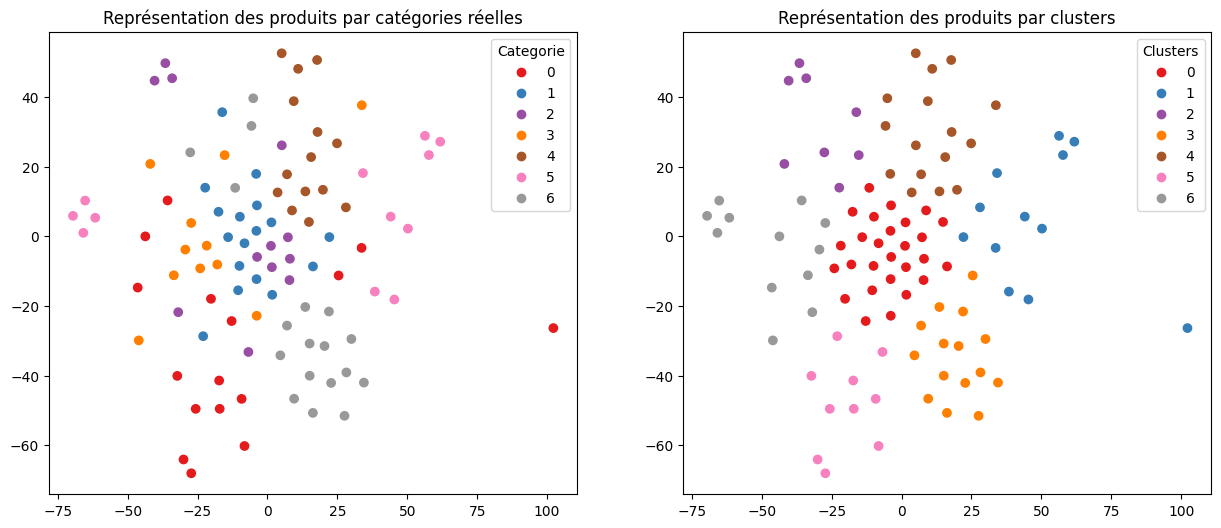

ARI :  0.3271


In [139]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="A3">**Part 5 : Model testing**</a>

In [145]:
d_mdl = {LogisticRegression : {'solver':['lbfgs','saga'], 'penalty':['l1','l2']},
             SVC : {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1]},
             RandomForestClassifier : {},
             MultinomialNB : {}, 
             ComplementNB : {}}
tab_recap = [['Model', 'Accuracy_train','Accuracy_test']]

#GridSearchCV sur le train set
for model in d_mdl :
    clf_grid = GridSearchCV(model(),d_mdl[model],cv=5,verbose=2) 
    clf_grid.fit(X_train, y_train)

    #Entraînement du modèle avec les paramètres optimum sur tous le train set
    clf_best = model(**clf_grid.best_params_)
    clf_best.fit(X_train, y_train)
    
    #Enregisterment de l'accuracy
    #Regression sur le test set
    y_pred = clf_best.predict(X_test)

    #Compraison des scores train et test set
    tab_recap.append([model,clf_best.score(X_train, y_train),clf_best.score(X_test, y_test)])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ............................penalty=l1, solver=saga; total time=   0.0s
[CV] END ............................penalty=l1, solver=saga; total time=   0.0s
[CV] END ............................penalty=l1, solver=saga; total time=   0.0s
[CV] END ............................penalty=l1, solver=saga; total time=   0.0s
[CV] END ............................penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ...........................penalty=l2, s

C:\Users\John\Desktop\Formation\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\John\Desktop\Formation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\John\Desktop\Formation\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\John\Desktop\Formation\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 54

[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.9; total time=   0.0s
[CV] END ..............................................C=0.9; total time=   0.0s
[CV] END ...................

In [146]:
# Visualisation du tableaux des scores
pd.DataFrame(tab_recap[1:],columns=tab_recap[0])

,Model,Accuracy_train,Accuracy_test
0,<class 'sklearn.linear_model._logistic.Logisti...,0.142857,0.233333
1,<class 'sklearn.svm._classes.SVC'>,0.742857,0.466667
2,<class 'sklearn.ensemble._forest.RandomForestC...,1.000000,0.633333
3,<class 'sklearn.naive_bayes.MultinomialNB'>,0.342857,0.200000
4,<class 'sklearn.naive_bayes.ComplementNB'>,0.800000,0.700000


## Model  Accuracy

In [147]:
#Regression sur le test set
y_pred = clf_best.predict(X_test)

#Compraison des scores train et test set
print('Régression {} train set score : {:.2f}'
      .format(model,clf_best.score(X_train, y_train)))
print('Régression {} test set score : {:.2f}'
      .format(model,clf_best.score(X_test, y_test)))

Régression <class 'sklearn.naive_bayes.ComplementNB'> train set score : 0.80
Régression <class 'sklearn.naive_bayes.ComplementNB'> test set score : 0.70


## Model Confusion Matrix

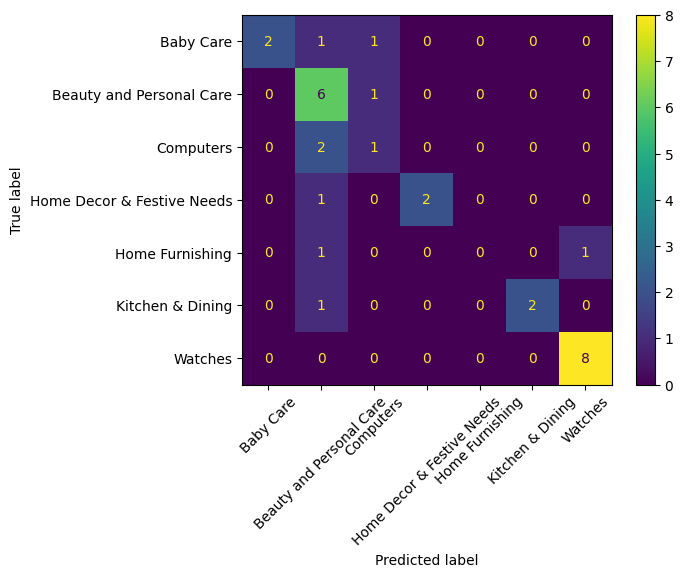

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)